# Lab 7: Supervised Learning - k-Nearest Neighbor (kNN) Algorithm 

In this lab, we will make first steps in doint supervised learning. in particular, we will learn about the k-Nearest Neighbor (kNN) algorithm. kNN uses a simple idea: "you are what your neighbors are". This idea work quite well in data science. In the first part of the lab, we will cover some background needed to understand the kNN algorithm. In the second part, you will be asked to apply your knowledge on another data set. 

## Lab 7.A: kNN Tutorial with Questions (50% of grade)

As usual, let us start by importing the needed libraries. We will continue using the sklearn library, which implements many of the most popular data science algorithms. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

Let us load the Iris data set using a sklearn function `load_iris`.

In [2]:
iris = datasets.load_iris()

As you can see from http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html, `iris` is an object with attributes `data` (a 150x4 matrix, where $i$-th row are 4 attributes of the $i$-th flower), `feature_names` (the names of the 4 attributes -- remember that in data science "attribute" and "feature" means the same thing), `target` (a vector of length 150, where $i$-th number is the type of the $i$-th flower -- in data science people often say "label" instead of "target"), `target_names` (these are strings explaining what each of the 3 types of flowers are), and `DESCR` (giving some information about the Iris data set). Let us list them all 

In [3]:
print iris.DESCR
print iris.data
print iris.feature_names
print iris.target
print iris.target_names

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

So, we can see that the attributes of the second flower are `[4.9, 3.0, 1.4, 0.2]`, which means its `sepal_length` is 4.9 cm, `sepal_width` is 3.0 cm, `petal_length` is 1.4 cm, and `petal_width` is 0.2 cm. We will write it matematically as $x_2 = [x_{21}, x_{22}, x_{23}, x_{24}] = [4.9, 3.0, 1.4, 0.2]$. We see that its `target` is 0, which means the type of this iris is `setosa`. We will write it matematically as $y_2 = 0$. All this information was obtained by real botanists who studied iris flowers trying to understand the physical measurements that discriminate between the 3 different types of those flowers.

In data science, people like to denote this data set as $D_{Iris} = \{(x_i, y_i), i = 1, 2 ... 150\}$, meaning that data set $D_{Iris}$ is a set of 150 labeled examples $(x_i, y_i)$. An alternative is to write $D_{Iris} = \{X_{Iris}, Y_{Iris}\}$.

### Supervised Learning
Supervised learning is a game with the following objective. You are given the iris data set $D_{Iris}$ where you know 4 attributes and target values for 150 irises and your objective is to come up with a computer program that predicts a type of any iris flower given the values of its 4 attributes. Written in pseudocode, this is what you have to do:

`predictor = create(algorithm_type, D)
y_new = predictor(x_new)`

In the first line, you are running a `create` function that takes as input data set `D` and the name of a supervised learning algorithm `algorithm_type` and produces as an output a computer program `predictor`. In the second line, you are using `predictor` to predict the label (`y_new` value) for a flower whose attributes are given by `x_new`.

### kNN Algorithm
kNN is a popular supervised learning algorithm that allows us to create `predictor`. The idea of kNN is that the label of flower `x_new` depends on labels of flowers in its neighborhood. In particular, kNN finds the distance between `x_new` and every example `x` in data set `D`. Then, it looks at the label `y` of k examples which are the closest to `x_new`. The predicted label `y_new` is obtained as the most common label in the group of the k nearest neighbors.

**Parameter choice**. We need to make a few decisions when running kNN. The most important is the choice of `k`. If `k = 1`, then we are looking only at the hearest neighbor and it might not be a good idea if we are dealing with noisy data. If `k` is very large, then we might be counting far neighbors that might have different properties. Other decisions include the choice of distance metric (Euclidean is the standard one) and the choice whether to weight closer neighbors more than the farther ones.

**Accuracy**. When deciding which parameters to pick or which supervised learning algorithm to use (there are popular algorithms other than kNN), the question is how to measure which choice is better. The answer is to check if `predictor` provides accurate prediction. Given a data set `D`, a typical way to check accuracy is to randomly split `D` into two data sets, `D_train` and `D_test`. Then, `predictor` is created/trained using `D_train` data set and its accuracy is checked using `D_test`. In particular, we use `predictor` to predict label of every example from `D_test` and compare it with the true labels. The percentage of the correct guesses on `D_test` is reported as accuracy of `predictor`.

## kNN Demo
The following piece of code is taken from:
http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py. Let us run it.

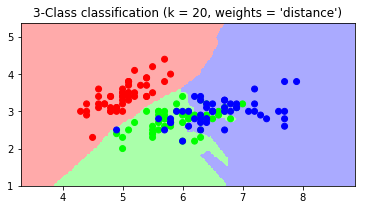

In [4]:
k = 20# how many nearest neighbors are consulted

X = iris.data[:, [0,1]]  # we only take the first two features. We could
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.figure(figsize=(6,3))   # this makes both axis equal 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'distance'))
plt.show()

The resulting figure shows the predictions of kNN when $k=1$. If `x_new` is in the blue region, the prediction will be the blue class. From this picture, we can observe a small blue blobs inside the predominantly gray area. This is because the nearest neighbor in this area is the blue example. 

**Question 1**. Change value of k to 3 and observe if there is any difference. Discuss what you see and why.
- The changes we see now is that before when k was 1 for outlier points like a blue point in predominatly green area  there was a small region of blue( basically an island) when the surronding areas was majorily green and red. Now when we changed it to k =3 we no longer see those small pockets as much and the colors seem to be clear cut when their are outliers. This is now occuring as now it is looking at the 3 closest neighbors which means for a single point in a predominantly one color area, it will see that the majority is the one color instead of the single point's color. Example the blue point right bewteen red and green area had island of blue when k=1 but when k=3 it is now part of green area.

**Question 2**. Change k to an even higher value, let us say to 25. What do we see now? Discuss.
- What we see now is that there seems to be a clear border or boundary of the predictive colors as before there were pockets of blue and green as they are so mixed that they were fighting bewteen each other. Now with K=25 it begans to look at points a little farther away and decides a majority so even though there are green and blue mixed in the green region, since out of 25 points there are closer green points than blue it becomes green.

**Queston 3**. In the line that creates `clf` change weights='uniform' to weights='distance'. Check the documentation or google to understand what it means. Explain. Run the code and discuss if you see any difference.
- What the line of code does is that when weights = uniform from the K values we get all are deemed as equal even if one is farther than other and determines majority based on them being equal. When it changes to weights=distance this means that a closer a point to the value the higher it weight than points farther away. I think the best way to explain is through an example so lets say we have a new point we are trying to quess type and lets say there are only 3 other points; a blue point really close and two green points really far from point. With weight = uniform and if k=3 then it will assume new point is green because even though green points are far away they are a majority of the points in queue, but when weights=distance it will say that the one point really close will weight much more greater than far away points and will probally predict new point is blue.

- When we do distance we began to see alot more pockets for k=3 and when k=25 we still see clear boundarys like we did before yet we see the shape of color when it was uniform changed. 

**Question 4**. Take a look at the code and try to understand what each line of the code does. Explain each line of code.

```python
k = 20# how many nearest neighbors are consulted

X = iris.data[:, [0,1]]  # we only take the first two features. We could
y = iris.target # The actual type of flower

h = .02  # step size in the mesh

# Create color map of background colors (light shade of red, green , blue)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
#Creates color map of color of data points (dark shade of red, green , blue)
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
#In this case gives weighting of distance( closer distance higher weight)
clf = neighbors.KNeighborsClassifier(k, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# Finds the min and max of x-values in the grid  
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# Finds the min and max of y-values in the grid  
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Creates a matrix with min and max x-values and y-values as the boundaries 
# Uses 0.2 as the difference between each point in the grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# The xx, yy values changed into a continuous array. Then they are translated
# as slice ojbects and concatenated along the second axis and are stored in Z
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
#The contious array Z is shaped into dimensions of xx
Z = Z.reshape(xx.shape)
#Creates a figure so we can plot
plt.figure()
plt.figure(figsize=(6,3))   # this makes both axis equal 
#Plots the colormesh backround using light shade of colors
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
#Sets the limits of the plot to be min and max values for x and y axis
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plot title
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'uniform'))
#Show Plot figure
plt.show()
```

### Training and testing
  As mentioned above, the typical mechanism for testing accuracy of a `predictor` is to split the data randomly into training and testing, train `predictor` on training data and test its performance on test data. Let us see how it can be done.

In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)
print X_train.shape
print X_test.shape


(100, 2)
(50, 2)


**Question 5**. What is the size of the resulting objects?

**Answer 5** 
- The size of the training data is now 100 flowers and the size of the test data is 50 flowers. This is beacuse we wanted our test size to be 33% of original data so in our case 150 was total and a third would be 50.

Now that we created training and test sets, we can train a kNN classifier using the training data. Before moving forward, let us take a second and take a look at the documentation for kNN implementation in sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

Let us train the kNN predictor:

In [6]:
#from sklearn.neighbors import KNeighborsClassifier
k = 1   # number of nearest neighbors
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
print predictor

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


Now that we trained `predictor` we can use it to provide predictions on any example `x`. 

In [14]:
# select the first 4 test examples
i = [0,1,2,3]
x = X_test[i,:]
print x
# predict its label
yhat = predictor.predict(x)
# compare predicted and true labels
print np.array(zip(yhat,y_test[i]))

[[6.3 3.4]
 [7.3 2.9]
 [6.7 3.1]
 [6.5 2.8]]
[[2 2]
 [2 2]
 [1 1]
 [2 1]]


**Question 6**. Did your kNN predictor do a good job in predicting labels of the first 4 test examples? 

**ANSWER 6**
- It did a pretty good job of predicting the labels as it was able to guess 3 out of the 4 correctly which would be a 75% accurracy. Overall we do not know if it is truely good as we need more points to try.

**Question 7**. Write a piece of code that calculates the accuracy on those 4 test examples (number of correct guesses divided by the total number of guesses


In [23]:
def accuracy(yhat,ytest):
    correct=0.0
    guess=0
    for value in yhat:
        if(value==ytest[guess]):
            correct+=1
        guess+=1
    return (correct/guess)
print str(accuracy(yhat,y_test))            

0.75


**Question 8**. Find the predictions on all test examples in `X_test` and calculate the accuracy using your code from *Question 7*.

Pay attention that methods in sklearn.neighbors.KNeighborsClassifier allow you to test the accuracy in a faster way (you should not use it to answer Questions 7 and 8):

In [24]:
###ANSWER 8
yguess=predictor.predict(X_test)
print np.array(zip(yguess,y_test))
print "The accuracy of all test values is "+str(accuracy(yguess,y_test))

[[2 2]
 [2 2]
 [1 1]
 [2 1]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [2 1]
 [1 2]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 2]
 [0 0]
 [1 2]
 [2 2]
 [1 1]
 [2 1]
 [2 2]
 [1 2]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [2 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [2 1]
 [1 2]
 [2 2]
 [1 1]
 [1 2]
 [2 1]
 [2 2]
 [2 1]
 [0 0]]
The accuracy of all test values is 0.74


In [22]:
accuracy = predictor.score(X_test,y_test)
print accuracy

0.74


**Question 9**. Train `predictor` using different choices of k. Try $k = 1, 3, 5, 15, 25, 50$. Report the accuracies on the test data (you can use the score method). Which choice of $k$ resulted in the highest accuracy? Comment briefly if the results make sense to you.

In [28]:
k=[1,3,5,15,25,50]
for value in k:
    predictor = neighbors.KNeighborsClassifier(n_neighbors = value)
    predictor.fit(X_train, y_train);
    accuracy = predictor.score(X_test,y_test)
    print "The accuracy for when K is " +str(value)+ " is " + str(accuracy)


The accuracy for when K is 1 is 0.74
The accuracy for when K is 3 is 0.8
The accuracy for when K is 5 is 0.82
The accuracy for when K is 15 is 0.78
The accuracy for when K is 25 is 0.82
The accuracy for when K is 50 is 0.7


**Answer 9**
- When k was 5 and 25 the accuracy was the highest of about 82%. This makes sense as we want more than one point to determine what should be our guess so 1 and even 3 is not sufficent. I think using 25 as k was just chance in producing also the highest accuracy as with too many points, it will no longer be even looking at things really close to points but even points pretty far from guessing point. Overall, I think 5 is the true greates choice for accuracy.

**Question 10**. Other than choice of $k$, `KNeighborsClassifier` allows you to make some other choices. For example, in *Question 3* you saw that you can use a weighted prediction. There are few other options. Study the documentation and summarize in few sentences what other options you have when training the kNN classifier.

**Answer 10**
Some of the other ways we can train the classifier is by
- n_neighbors which is what we have been using(look at n neighbors to determine classification)
- weighted has 2 options of uniform and weighted in which uniform just gives each point close to guessing point same weight while weighted says that points closer in distance to guessing point will be weighted more( greater status) when deciding final guess
- different formulas in calculating distances like euclidean, cosine, jaccard, etc.
- different algorithmns in deciding what is considered closest neighbor ball tree, brute, kd_tree

## Lab 7.B Training kNN classifier on Iris and Newsgroups data
In this part of the lab you will use your knowledge to train and test accuracy of kNN classifiers on Iris and Newsgroups data.

#### Iris Questions
In Lab 7.A you used only the first two attributes of Iris for prediction. You have 2 questions:

**Question Iris 1**. Train kNN classifier on other pair of attributes. Use $k$ of your choice and feel free to keep other choices at their default values. Which pair of attributes results in the highest accuracy?

**ANSWER 9** 
- After running the following code I can see that using the first and fourth attribute produced the highest accuracy of 96% 

In [52]:
y = iris.target
X = iris.data #load all data and split it
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)
predictor = neighbors.KNeighborsClassifier(n_neighbors = 7)
firstA=[0,1,2,3]
#Using 7 as k will calculate accuracy of all pairs (0,1),(0,2),(0,3),(1,2),(1,3),(2,3)
for value in firstA:
    hold=3-value
    if(hold>0):
        j=1
        while(j<=hold):
            X_train2=X_train[:,[value,value+j]]
            X_test2=X_test[:,[value,value+j]]
            predictor.fit(X_train2, y_train);
            accuracy = predictor.score(X_test2,y_test)
            print "The accuracy for when attributes are " +str(value)+ " and " +str(value+j)+" is " + str(accuracy)
            j+=1

The accuracy for when attributes are 0 and 1 is 0.66
The accuracy for when attributes are 0 and 2 is 0.9
The accuracy for when attributes are 0 and 3 is 0.96
The accuracy for when attributes are 1 and 2 is 0.88
The accuracy for when attributes are 1 and 3 is 0.9
The accuracy for when attributes are 2 and 3 is 0.94


**Question Iris 2**. Train kNN classifier using all 4 attributes. Report the accuracy on test data set. Play with parameters of kNN to try to find a combination that results in the highest accuracy. Can you find something that works better than $k=3$ and default choices?

In [82]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

In [101]:
predictor = neighbors.KNeighborsClassifier(n_neighbors = 3)
predictor.fit(X_train, y_train);
accuracy = predictor.score(X_test,y_test)
print "The accuracy using default, all atrributes and k=3 is " +str(accuracy)

#AFTER TRYING DIFFERENT PARAMETERS
predictor = neighbors.KNeighborsClassifier(n_neighbors = 15,weights='distance',algorithm='auto',metric='minkowski')
predictor.fit(X_train, y_train);
accuracy = predictor.score(X_test,y_test)
print "The accuracy using weight=distance, k=15, and metric=minkowski is " +str(accuracy)

The accuracy using default, all atrributes and k=3 is 0.94
The accuracy using weight=distance, k=15, and metric=minkowski is 0.98


## Newsgroups Questions
In Lab you already got experience working with the newsgroups data. 

**Question News 1**. Since kNN is a relatively slow algorithms, create your data set by picking 1,000 examples randomly. Remember to record both attribute values and labels. Split your data into 66% training and 33% test data sets.

In [102]:
wordlist = np.loadtxt('wordlist.csv', delimiter=",",dtype='str')
documents = np.loadtxt('documents.csv', delimiter=",",dtype='int')
documents = np.transpose(documents)
newsgroup = np.loadtxt('newsgroup.csv', delimiter=",",dtype='int')
groupnames = np.loadtxt('groupnames.csv', delimiter=",",dtype='str')

In [113]:
##ANSWER 1
#Gets 1000 random ints bewteen range of number of documents
rand1000 = np.random.randint(documents.shape[0], size=1000)
X=documents[rand1000] 
y=newsgroup[rand1000]
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.333)
print 'The size of the X_train data is ' + str(len(X_train))
print 'The size of the y_train data is ' + str(len(y_train))
print 'The size of the X_test data is ' + str(len(X_test))
print 'The size of the y_test data is ' + str(len(y_test))

The size of the X_train data is 667
The size of the y_train data is 667
The size of the X_test data is 333
The size of the y_test data is 333


**Question News 2**. Train a kNN classifier ($k=3$ and defaults) on the training data and test its accuracy on test data. Record the computational time needed to run this. Report the accuracy (pay attention there are 4 types of documents).

In [130]:
#ANSWER 2
import time
start=time.time()
predictor = neighbors.KNeighborsClassifier(n_neighbors = 3)
predictor.fit(X_train, y_train);
accuracy = predictor.score(X_test,y_test)
end=time.time()
print "The accuracy using default, all atrributes and k=3 is " +str(accuracy)
print "The Time it took to calculate is " +str(end-start)+ " seconds"
#yguess=predictor.predict(X_test)
#print np.array(zip(yguess,y_test))

The accuracy using default, all atrributes and k=3 is 0.5825825825825826
The Time it took to calculate is 0.0476222038269 seconds


**Question News 3**. Train a kNN classifier using different values of $k$, hoping to improve accuracy. Try to use some other distance other than Euclidean. For example, cosine distance is know to work better than Eucliedean on text data.

In [231]:
#ANSWER 3
#AFTER TESTING DIFFERENT PARAMETERS THIS RESULTED THE BEST
predictor = neighbors.KNeighborsClassifier(n_neighbors = 25,metric = 'cosine', algorithm = 'brute')
predictor.fit(X_train, y_train);
accuracy = predictor.score(X_test,y_test)
print "The accuracy using cosine,brute, and k=27 is " +str(accuracy)

The accuracy using cosine,brute, and k=27 is 0.6816816816816816


**Question Nesw 4**. Transform the original 100 attributes into 5 attributes using SVD. Train and test the kNN on the transformed data. Report the accuracies. You might be surprised to see that accuracy could go up. Discuss why this might be so.

In [278]:
#ANSWER 4
U,s,V = np.linalg.svd(X,full_matrices=0)
reduced5 = np.dot(U[:,0:5],np.diag(s)[0:5,0:5])
#reduced5= np.dot(X,V[:,0:5])
print reduced5.shape
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    reduced5, y, test_size=0.333)
predictor = neighbors.KNeighborsClassifier(n_neighbors = 29,metric = 'cosine', algorithm = 'auto')
predictor.fit(X_train, y_train);
accuracy = predictor.score(X_test,y_test)
print "The accuracy using cosine and k=29 is " +str(accuracy)

(1000, 5)
The accuracy using cosine and k=29 is 0.7177177177177178


**ANSWER 4**

- The reason why the SVD produces a better accuracy is because even though now it is looking at a reduction of 5 attributes, before looking at 100 attributes meant calucalting distances in a high dimension space which has been known to all be realltivly same distance thus producing error. Now with a reduction of the dimensions to 5 the distances are more meaningful and therfore the predictor is better at guessing.